In this Project, we'll:

- explore why image classification is a hard task
- observe the limitations of traditional machine learning models for image classification
- train, test, and improve a few different deep neural networks for image classification

# Working With Image Data

Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of sklearn.datasets. The load_digits() function returns a copy of the hand-written digits dataset from UCI.

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (28 x 28 pixels). To visualize the image, we need to reshape these pixel values back into the 28 by 28 and plot them on a coordinate grid.

In [2]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt

hand_written_dataset = load_digits()

hand_written_dataset.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
features = pd.DataFrame(hand_written_dataset['data'])
labels = pd.Series(hand_written_dataset["target"])

In [4]:
features.head(1)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


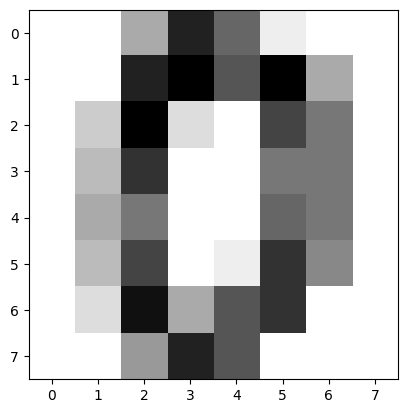

In [5]:
first_image = features.iloc[0].values
image_1 = first_image.reshape(8,8)
plt.imshow(image_1, cmap='gray_r')
plt.show()

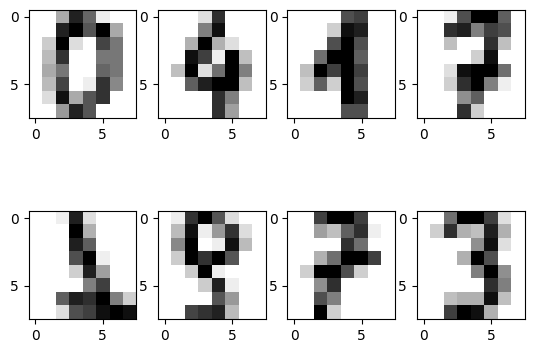

In [6]:
f, ax = plt.subplots(2, 4)

ax[0, 0].imshow(features.iloc[0].values.reshape(8,8), cmap='gray_r')
ax[0, 1].imshow(features.iloc[100].values.reshape(8,8), cmap='gray_r')
ax[0, 2].imshow(features.iloc[200].values.reshape(8,8), cmap='gray_r')
ax[0, 3].imshow(features.iloc[300].values.reshape(8,8), cmap='gray_r')

ax[1, 0].imshow(features.iloc[1000].values.reshape(8,8), cmap='gray_r')
ax[1, 1].imshow(features.iloc[1100].values.reshape(8,8), cmap='gray_r')
ax[1, 2].imshow(features.iloc[1200].values.reshape(8,8), cmap='gray_r')
ax[1, 3].imshow(features.iloc[1300].values.reshape(8,8), cmap='gray_r')

# K-Nearest Neighbors Model

While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption. This allows them to capture nonlinearity in the data. If you recall, k-nearest neighbors don't have a specific model representation (hence why it's referred to as an algorithm and not a model).

The k-nearest neighbors algorithm compares every unseen observation in the test set to all (or many, as some implementations constrain the search space) training observations to look for similar (or the "nearest") observations. Then, the algorithm finds the label with the most nearby observations and assigns that as the prediction for the unseen observation.

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

accuracies = []

def train(neighbors, train_features, train_labels) :
    knn = KNeighborsClassifier(neighbors)
    knn.fit(train_features, train_labels)
    return knn
    
def test(model, test_features, test_labels):
   # overall_accuracy = model.score(test_features, test_labels)
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(k):    
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]
fold_accuracies = []
scores = []
for k in k_values :
    scores.append(np.mean(cross_validate(k)))
    


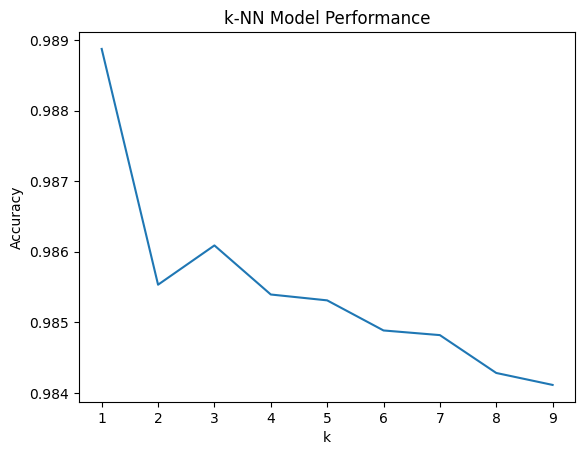

In [168]:
plt.plot(k_values, scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k-NN Model Performance')
plt.show()

# Neural Network With One Hidden Layer

There are a few downsides to using k-nearest neighbors:

- high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
- no model representation to debug and explore

Let's now try a neural network with a single hidden layer with 8 neurons

In [182]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

# 50% Train / test validation
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer

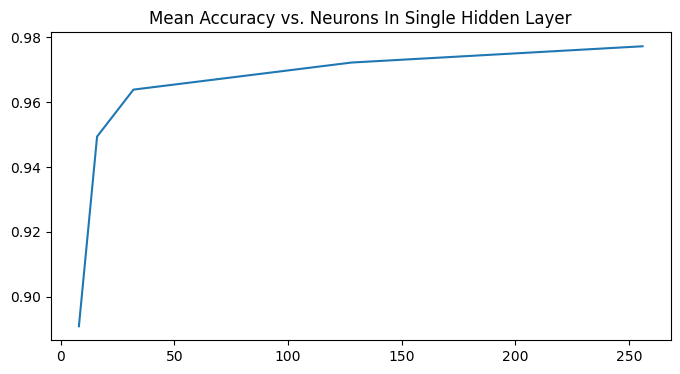

In [183]:
nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_one_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)
    

### Summary:
It looks like adding more neurons to the single hidden layer improved simple accuracy to approximately 97%. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately 98% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

# Neural Network With Two Hidden Layers

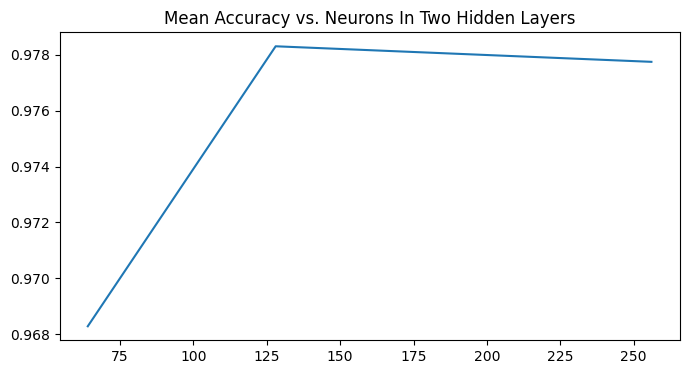

In [184]:
nn_two_neurons = [
    (64,64),
    (128, 128),
    (256, 256)
]
nn_two_accuracies = []

for n in nn_two_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)

## Summary
Using two hidden layers improved our simple accuracy to 97.8%. While, traditionally, we might worry about overfitting, using four-fold cross validation also gives us a bit more assurance that the model is generalizing to achieve the extra 1% in simple accuracy over the single hidden layer networks we tried earlier.

# Neural Network with Three Hidden Layers

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

accuracies = []

def train(nb_neurons, train_features, train_labels) :
    mlp = MLPClassifier(hidden_layer_sizes =(nb_neurons,nb_neurons, nb_neurons), activation='relu')
    mlp.fit(train_features, train_labels)
    return mlp
    
def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(nb_neurons):   
    fold_accuracies = []
    kf = KFold(n_splits = 6, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(nb_neurons, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

nb_neurons = [64, 128, 256]
nn_accuracies = []
scores = []
for neurons in nb_neurons :
    scores.append(np.mean(cross_validate(neurons)))

    


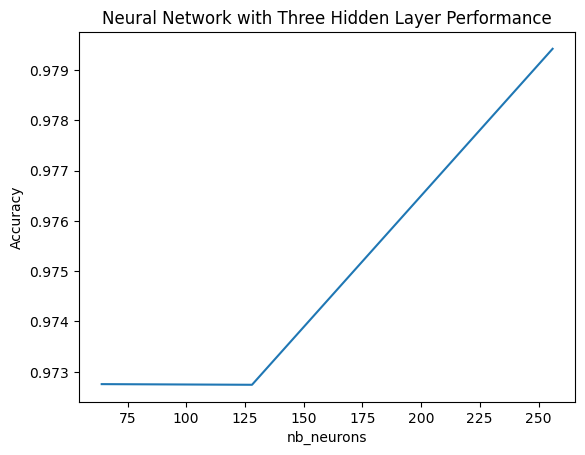

In [190]:
plt.plot(nb_neurons, scores)
plt.xlabel('nb_neurons')
plt.ylabel('Accuracy')
plt.title('Neural Network with Three Hidden Layer Performance')
plt.show()
    

## Summary
Using three hidden layers returned a simple accuracy of nearly 98%, even with six-fold cross validation.

# TEST on One Hidden Layer with model.score 

In [207]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score

# 50% Train / test validation
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    overall_accuracy = model.score(test_features, test_labels)
    return overall_accuracy

def cross_validate(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies, model, test_features

In [208]:
nb_neurons = [8, 16, 32, 64, 128, 256]
nn_accuracies = []
scores = []
for neurons in nb_neurons :
    accuracy, model, test_features = cross_validate(neurons)
    scores.append(np.mean(accuracy))

/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer

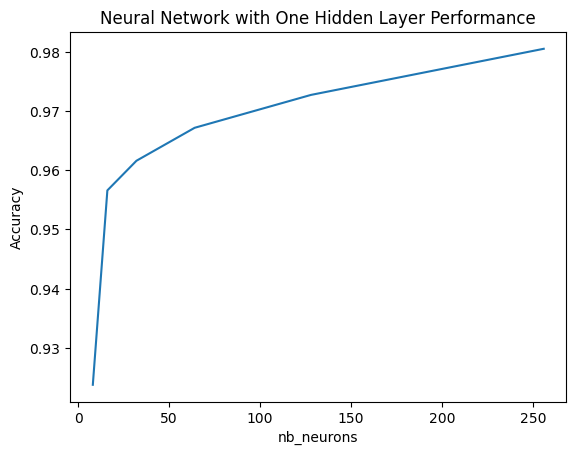

In [209]:
plt.plot(nb_neurons, scores)
plt.xlabel('nb_neurons')
plt.ylabel('Accuracy')
plt.title('Neural Network with One Hidden Layer Performance')
plt.show()

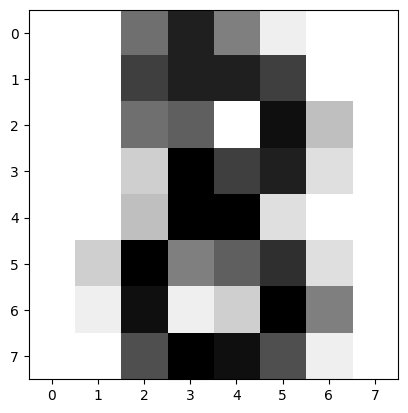

8


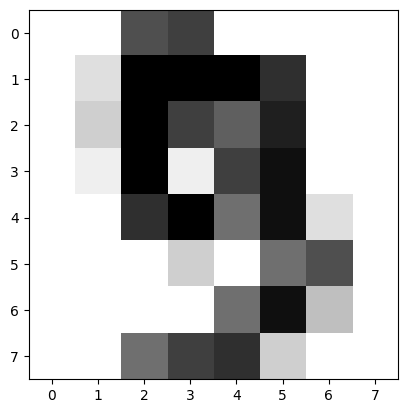

9


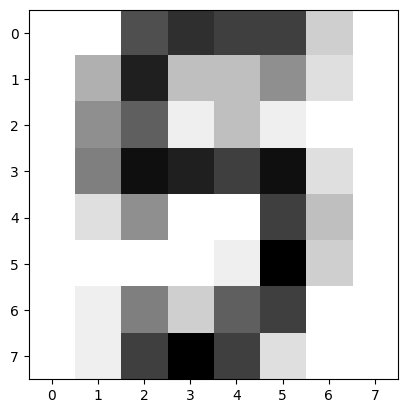

5


In [228]:
first_image = test_features.iloc[0].values
image_1 = first_image.reshape(8,8)
plt.imshow(image_1, cmap='gray_r')
plt.show()
print(model.predict(test_features)[0])

first_image = test_features.iloc[1].values
image_1 = first_image.reshape(8,8)
plt.imshow(image_1, cmap='gray_r')
plt.show()
print(model.predict(test_features)[1])

first_image = test_features.iloc[133].values
image_1 = first_image.reshape(8,8)
plt.imshow(image_1, cmap='gray_r')
plt.show()
print(model.predict(test_features)[133])

